# Gaussian Mixture Models : Latent Variable Model using Expectation - Maximization Algorithm

We will take 1D example only.

In [8]:
import numpy as np

import matplotlib.pyplot as plt

### 1. First we will make the points for clustering.

In [9]:
std_norm = np.random.standard_normal(1000)

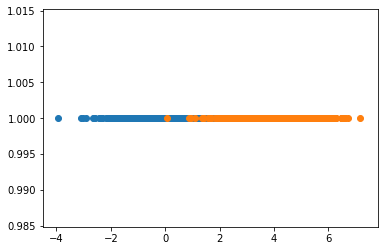

In [12]:
plt.scatter(std_norm, np.ones(1000))
plt.scatter(4+std_norm, np.ones(1000))

In [14]:
all_pts = np.append(std_norm, 4+std_norm)

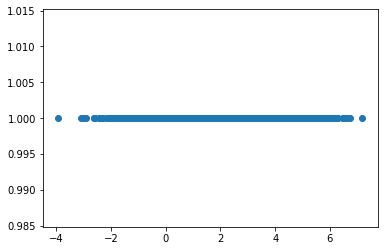

In [19]:
plt.scatter(all_pts, np.ones(2000))

In [22]:
all_pts_random = np.random.permutation(all_pts)

### 2. Making a Gaussian sampler

In [29]:
def Gaussian(x, mu=0, sig=1):
    return (1/(2*np.pi*sig**2)**0.5) * np.exp(-0.5 * ((x - mu) / sig)**2)

In [30]:
x = np.linspace(-5,5,5000)

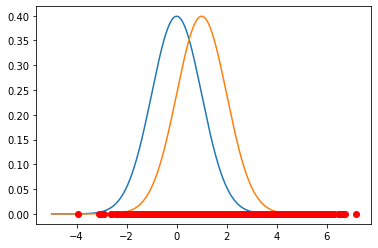

In [42]:
plt.plot(x,Gaussian(x,0,1))
plt.plot(x,Gaussian(x,1,1))
plt.plot(all_pts, np.zeros(2000), "ro")

### 3. Expectation Maximization Algorithm

In [43]:
mu1, sig1, mu2, sig2 = 2*np.random.rand(4)

In [81]:
mu1, sig1, mu2, sig2

(1.9856342067506831,
 1.6466427974431028,
 1.0894647520871126,
 1.4986892784798147)

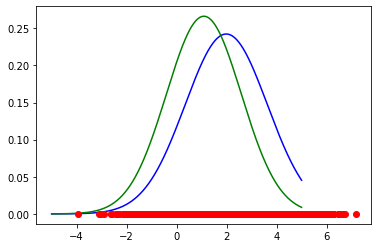

In [89]:
plt.plot(x,Gaussian(x,mu1,sig1), 'b')
plt.plot(x,Gaussian(x,mu2,sig2), 'g')
plt.plot(all_pts, np.zeros(2000), "ro")

In [77]:
G1 = Gaussian(all_pts_random, mu1, sig1)
G2 = Gaussian(all_pts_random, mu2, sig2)

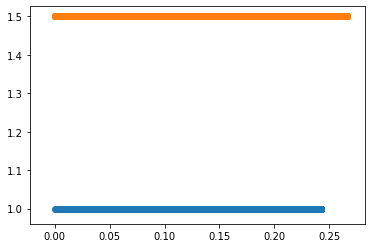

In [78]:
plt.scatter(G1, np.ones(2000))
plt.scatter(G2, 0.5 + np.ones(2000))

For new Means and Variances

In [83]:
new_mu1 = np.sum(G1*all_pts_random )/np.sum(G1)
new_mu1

1.9917011404646596

In [84]:
new_mu2 = np.sum(G2*all_pts_random )/np.sum(G2)
new_mu2

1.0093301794335126

In [86]:
new_sig1 = np.sqrt(np.sum(G1*(all_pts_random-new_mu1)**2)/np.sum(G1))
new_sig1

1.69875899930179

In [87]:
new_sig2 = np.sqrt(np.sum(G2*(all_pts_random-new_mu2)**2)/np.sum(G2))
new_sig2

1.4696357964490734

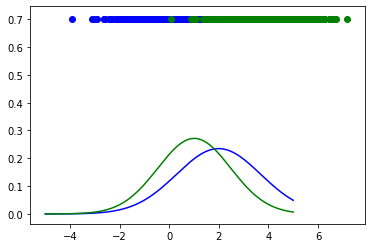

In [102]:
plt.plot(x,Gaussian(x,new_mu1,new_sig1), 'b')
plt.plot(x,Gaussian(x,new_mu2,new_sig2), 'g')

plt.scatter(std_norm, 0.7*np.ones(1000), c='b')
plt.scatter(4+std_norm, 0.7*np.ones(1000), c='g')



#### Putting it all in a loop

In [110]:
import time

In [203]:
def EMTrainer1D(clusters, inits, n_iter = 10):
    '''
    clusters: Pair of Cluster groups
    inits : List or Array of 4 values
    '''
    
    mu1, sig1, mu2, sig2 = inits
    params = []
    
    x = np.linspace(-2-np.min(inits), 2+np.max(inits), 5000)
    
#     plt.plot(x,Gaussian(x,mu1,sig1), 'b')
#     plt.plot(x,Gaussian(x,mu2,sig2), 'g')

#     plt.scatter(clusters[0], 0.7*np.ones(len(clusters[0])), c='b')
#     plt.scatter(clusters[1], 0.7*np.ones(len(clusters[1])), c='g')

    all_pts = np.append(clusters[0], clusters[1])
    

    G1 = Gaussian(all_pts, mu1, sig1)
    G2 = Gaussian(all_pts, mu2, sig2)
    
    G1 = G1/np.sum(G1)
    G2 = G2/np.sum(G2)
    
    params.append((mu1, mu2, sig1, sig2))
    
    for i in range(n_iter):
        new_mu1 = np.sum(G1*all_pts )/np.sum(G1)
        new_mu2 = np.sum(G2*all_pts )/np.sum(G2)
        new_sig1 = np.sqrt(np.sum(G1*(all_pts-new_mu1)**2)/np.sum(G1))
        new_sig2 = np.sqrt(np.sum(G2*(all_pts-new_mu2)**2)/np.sum(G2))

        G1 = Gaussian(all_pts, new_mu1, new_sig1)
        G2 = Gaussian(all_pts, new_mu2, new_sig2)
        
        G1 = G1/np.sum(G1)
        G2 = G2/np.sum(G2)
        
#         plt.plot(x,Gaussian(x,new_mu1,new_sig1), 'b')
#         plt.plot(x,Gaussian(x,new_mu2,new_sig2), 'g')

#         plt.scatter(clusters[0], 0.7*np.ones(len(clusters[0])), c='b')
#         plt.scatter(clusters[1], 0.7*np.ones(len(clusters[1])), c='g')
        
        params.append((new_mu1, new_mu2, new_sig1, new_sig2))

        
    return params

In [238]:
std_norm = np.random.standard_normal(250)

In [239]:
params = EMTrainer1D([std_norm, std_norm + 3], [-4,1,10,1])

Change $i$ to plot the parameters during $i^{th}$ iteration.

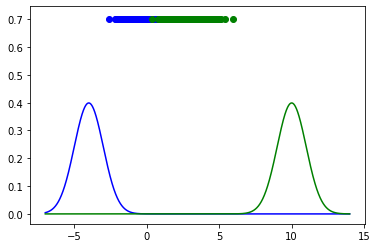

In [240]:
i = 0

x = np.linspace(-7, 14, 5000)


plt.plot(x,Gaussian(x,params[i][0], params[i][2]), 'b')
plt.plot(x,Gaussian(x,params[i][1], params[i][3]), 'g')

plt.scatter(std_norm, 0.7*np.ones(len(std_norm)), c='b')
plt.scatter(3+std_norm, 0.7*np.ones(len(std_norm)), c='g')

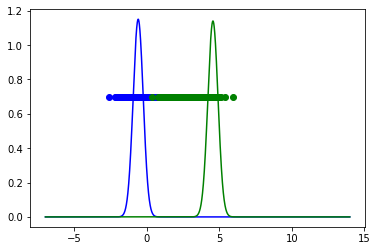

In [242]:
i = 5

x = np.linspace(-7, 14, 5000)


plt.plot(x,Gaussian(x,params[i][0], params[i][2]), 'b')
plt.plot(x,Gaussian(x,params[i][1], params[i][3]), 'g')

plt.scatter(std_norm, 0.7*np.ones(len(std_norm)), c='b')
plt.scatter(3+std_norm, 0.7*np.ones(len(std_norm)), c='g')

Notice how quickly the belief changes! In just about 5 iterations.